#Classification Models
Here we'll be using the MNIST handwritten number dataset, and attempting to do a bit of natural language processing. We'll be comparing a couple types of classification models and looking at how we can construct and evaluate them with SciKit Learn.

Note: typically the MNIST dataset is provided in a really strange format (for our purposes, I found a site that converts it to a more standard .csv file)

##Imports

In [1]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

import pandas as pd
import numpy as np

##Loading and Processing Data

In [2]:
#Dataset: https://pjreddie.com/projects/mnist-in-csv/
train = np.array(pd.read_csv('mnist_train.csv', nrows=1000, header=None))
test = np.array(pd.read_csv('mnist_test.csv', header = None))

In [3]:
test = test[~np.isnan(test).any(axis=1)]

In [4]:
X_train = train[:, 1:]
X_test = test[:, 1:]
y_train = train[:, 0:1]
y_test = test[:, 0:1]

In [5]:
X_test = X_test[~np.isnan(X_test).any(axis=1)]

In [6]:
print(X_test.shape)

(10000, 784)


In [7]:
print(X_train.shape)

(1000, 784)


In [11]:
y_train[0]

array([5])

In [ ]:
X_train[0]

##SVM

In [12]:
from sklearn.svm import SVC
clf = SVC()

clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [13]:
predicted = clf.predict(X_test)

In [14]:
predicted

array([7, 2, 1, ..., 4, 5, 6])

In [15]:
y_test

array([[7],
       [2],
       [1],
       ...,
       [4],
       [5],
       [6]])

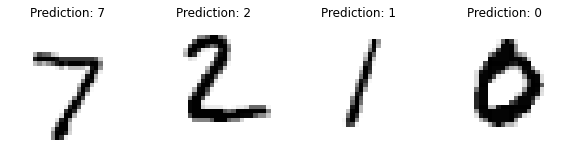

In [16]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

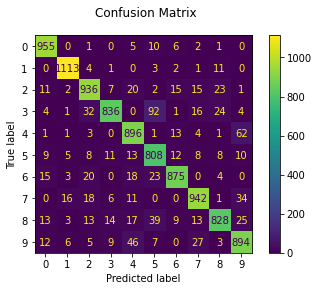

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
plt.show()

##Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier
c = RandomForestClassifier(max_depth=50, n_estimators=100, random_state=5)

In [24]:
c.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(max_depth=50, random_state=5)

In [25]:
pred_random = c.predict(X_test)

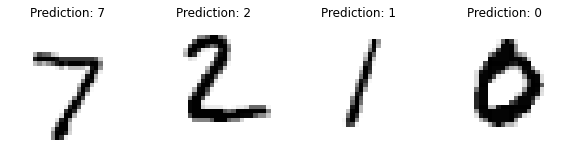

In [26]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, pred_random):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

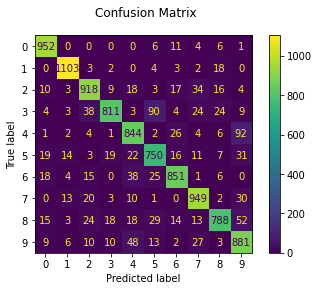

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_predictions(y_test, pred_random)
disp.figure_.suptitle("Confusion Matrix")
plt.show()